In [1]:
import pandas as pd
file_path = 'data/combined_country_data.csv'

# Read the CSV file
try:
    df = pd.read_csv(file_path, decimal='.')
    print("Data loaded successfully!")
    print("\nFirst 5 rows:")
    display(df.head())
except FileNotFoundError:
    print("File not found. Please check the path.")

Data loaded successfully!

First 5 rows:


,Country,Year,GDP per Capita ($),Population,Education Spending(%),Healthcare Spending($),Literacy(%),Life Expectancy,Fertility Rate,Infant Mortality Rate,Unemployment(%),Youth Unemployment(%)
0,Afghanistan,2019,498.0,37769499.0,NaN,74.0,0.00,64.0,4.870,48.8,11.22,15.92
1,Afghanistan,2020,512.0,38972230.0,NaN,80.0,0.00,63.0,4.750,47.4,11.71,16.05
2,Afghanistan,2021,356.0,40099462.0,NaN,81.0,37.27,62.0,4.643,46.1,11.93,16.39
3,Afghanistan,2022,353.0,41128771.0,NaN,0.0,0.00,63.0,4.523,44.8,14.10,17.75
4,Albania,2019,5396.0,2854191.0,11.4,368.0,0.00,79.0,1.414,8.3,11.47,27.14


In [2]:
# Check NaN values
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
Country                     0
Year                        0
GDP per Capita ($)         24
Population                  0
Education Spending(%)     160
Healthcare Spending($)    120
Literacy(%)               332
Life Expectancy            28
Fertility Rate             24
Infant Mortality Rate      84
Unemployment(%)           120
Youth Unemployment(%)     120
dtype: int64


In [3]:
import plotly.io as pio
pio.renderers.default = "jupyterlab+png"

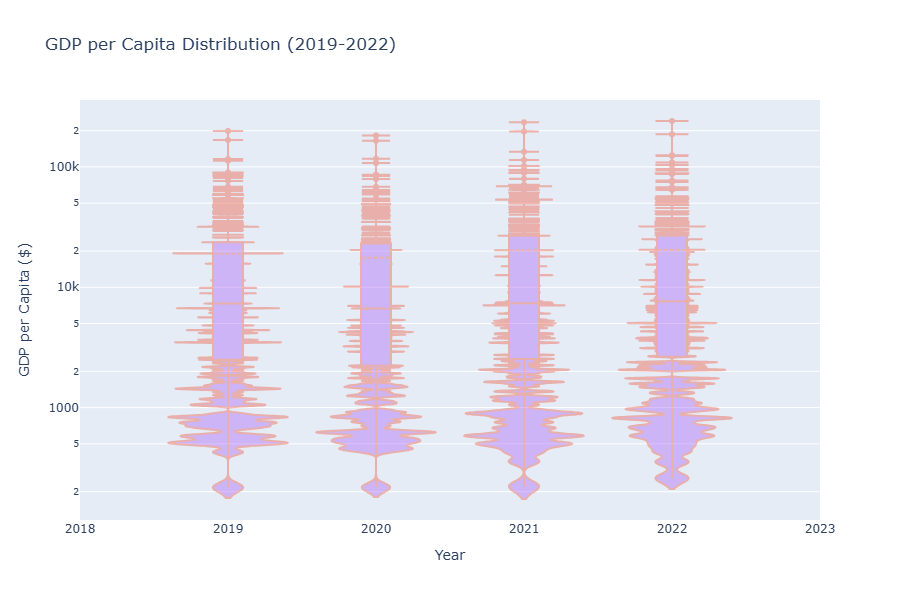

In [4]:
# Let's visualize stats for GDP per Capita by Year
from helpers.filters import filter_none
import plotly.graph_objects as go
import pandas as pd

df_copy = df.copy()
df_clean = filter_none(df_copy, 'GDP per Capita ($)')

fig = go.Figure()

years = sorted(df_clean['Year'].unique())

for year in years:
    fig.add_trace(go.Violin(
        x=df_clean['Year'][df_clean['Year'] == year],
        y=df_clean['GDP per Capita ($)'][df_clean['Year'] == year],
        name=str(year),
        box_visible=True,
        meanline_visible=True,
        points="outliers",
        line_color='#EF553B',
        fillcolor='#AB63FA',
        opacity=0.4,
        hoverinfo='y',
        bandwidth=0.2
    ))


fig.update_layout(
    title='GDP per Capita Distribution (2019-2022)',
    xaxis_title='Year',
    yaxis_title='GDP per Capita ($)',
    yaxis_type='log',
    violingap=0.1,
    violingroupgap=0.1,
    height=600,
    width=900,
    hovermode='closest',
    showlegend=False
)

fig.update_traces(
    hovertemplate="<b>Year %{x}</b><br>GDP: $%{y:,.0f}<extra></extra>"
)

for i, year in enumerate(years):
    median = df_clean[df_clean['Year'] == year]['GDP per Capita ($)'].median()
    fig.add_annotation(
        x=i,
        y=median,
        text=f"Median:<br>${median:,.0f}",
        showarrow=False,
        yshift=10
    )
fig.update_layout(xaxis_range=[2018, 2023])
fig.show()

GDP per capita of lower income countries has been increasing through this period. It's a little bit hard to extract the other informations, so let's plot Q1, Q2, median and average for this period.

In [5]:
df_clean = filter_none(df_copy, 'GDP per Capita ($)')
gdp_stats = df_clean.groupby('Year')['GDP per Capita ($)'].describe()
print("Descriptive statistics for GDP per Capita by Year:")
print(gdp_stats)

Descriptive statistics for GDP per Capita by Year:
      count          mean           std    min      25%     50%       75%  \
Year                                                                        
2019  210.0  19024.447619  27600.780741  217.0  2501.50  7331.0  23681.50   
2020  209.0  17634.124402  26198.740493  217.0  2234.00  6660.0  22993.00   
2021  208.0  20333.038462  31125.233985  221.0  2539.00  7359.0  26829.75   
2022  202.0  20434.064356  31361.326882  259.0  2658.75  7657.0  26435.00   

           max  
Year            
2019  199383.0  
2020  182537.0  
2021  235133.0  
2022  240862.0  


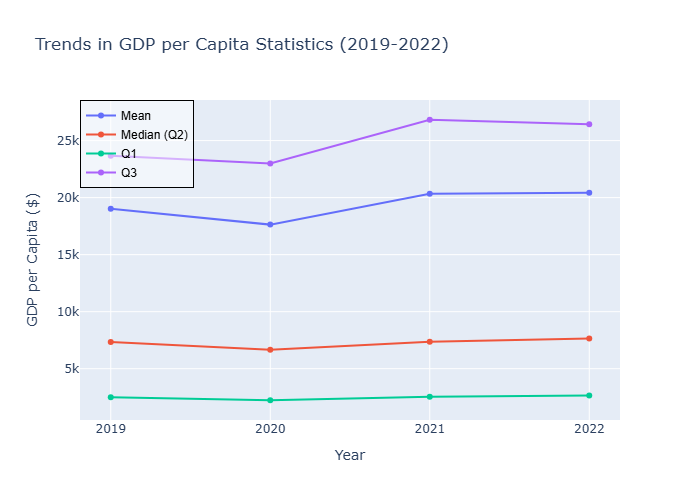

In [6]:
# Plot Q1, Median, Q3, and Mean for each year
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=gdp_stats.index,
    y=gdp_stats['mean'],
    mode='lines+markers',
    name='Mean'
))

fig.add_trace(go.Scatter(
    x=gdp_stats.index,
    y=gdp_stats['50%'],
    mode='lines+markers',
    name='Median (Q2)'
))

fig.add_trace(go.Scatter(
    x=gdp_stats.index,
    y=gdp_stats['25%'],
    mode='lines+markers',
    name='Q1'
))

fig.add_trace(go.Scatter(
    x=gdp_stats.index,
    y=gdp_stats['75%'],
    mode='lines+markers',
    name='Q3'
))

fig.update_layout(
    title='Trends in GDP per Capita Statistics (2019-2022)',
    xaxis_title='Year',
    yaxis_title='GDP per Capita ($)',
    xaxis=dict(
        tickmode='array',
        tickvals=gdp_stats.index
    ),
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
        bgcolor="rgba(255, 255, 255, 0.5)",
        bordercolor="Black",
        borderwidth=1
    ),
    hovermode='x unified'
)

fig.show()

The above plot shows:


*   Dip in 2020 - all metrics show dip in 2020, first Covid year
*   2021 - shows recovery in all metrics
*   2022 - Q1 and median are increasing together, which confirms that the lower-income countries are experiencing an increase in their GDP per capita
*   The mean is significantly higher, suggesting few high-income countries pulling the average up, for each year
*   2022 shows sligh decrease of Q3, likely due to inflation rate and global supply chain issues (https://www.imf.org/-/media/Files/Publications/WEO/2022/October/English/ch1.ashx)








Let's see which countries had the highest increase/decrease of GDP per capita in this period.

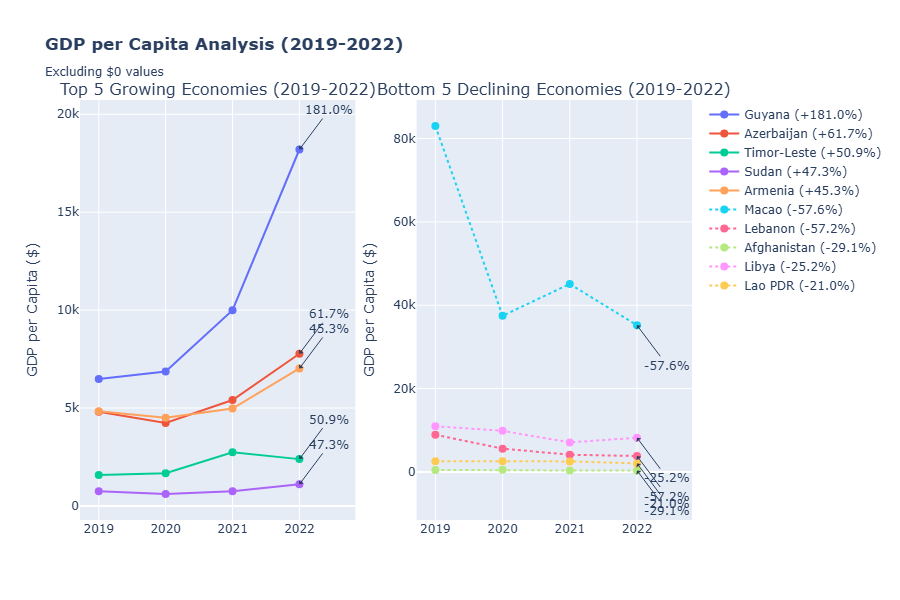

In [7]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

df_clean['GDP'] = df_clean['GDP per Capita ($)']

# Calculate GDP changes
gdp_pivot = df_clean.pivot_table(index='Country', columns='Year', values='GDP')
gdp_pivot['Change_2019_2022'] = ((gdp_pivot[2022] - gdp_pivot[2019]) / gdp_pivot[2019]) * 100
gdp_pivot['Change_2019_2022'] = gdp_pivot['Change_2019_2022'].round(1)

# Identify top/bottom performers
top5 = gdp_pivot.nlargest(5, 'Change_2019_2022').index.tolist()
bottom5 = gdp_pivot.nsmallest(5, 'Change_2019_2022').index.tolist()
extreme_countries = top5 + bottom5

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "scatter"}, {"type": "scatter"}]],
    subplot_titles=(
        'Top 5 Growing Economies (2019-2022)',
        'Bottom 5 Declining Economies (2019-2022)',
    ),
    vertical_spacing=0.15
)

years = sorted(df_clean['Year'].unique())

# Top performers
for country in top5:
    country_data = df_clean[df_clean['Country'] == country]
    change_pct = gdp_pivot.loc[country, 'Change_2019_2022']
    fig.add_trace(go.Scatter(
        x=country_data['Year'],
        y=country_data['GDP'],
        name=f"{country} (+{change_pct}%)",
        mode='lines+markers',
        line=dict(width=2),
        marker=dict(size=8)
    ), row=1, col=1)

# Bottom performers
for country in bottom5:
    country_data = df_clean[df_clean['Country'] == country]
    change_pct = gdp_pivot.loc[country, 'Change_2019_2022']
    fig.add_trace(go.Scatter(
        x=country_data['Year'],
        y=country_data['GDP'],
        name=f"{country} ({change_pct}%)",
        mode='lines+markers',
        line=dict(width=2, dash='dot'),
        marker=dict(size=8)
    ), row=1, col=2)

fig.update_layout(
    title_text='<b>GDP per Capita Analysis (2019-2022)</b><br><sub>Excluding $0 values</sub>',
    height=600,
    width=900,
    yaxis1=dict(title="GDP per Capita ($)"),
    yaxis2=dict(title="GDP per Capita ($)"),
    hovermode='x unified'
)

for i, country in enumerate(extreme_countries):
    change = gdp_pivot.loc[country, 'Change_2019_2022']
    fig.add_annotation(
        x=2022,
        y=gdp_pivot.loc[country, 2022],
        text=f"{change}%",
        showarrow=True,
        arrowhead=1,
        ax=30,
        ay=-40 if i < 5 else 40,
        col=1 if i < 5 else 2,
        row=1
    )

fig.show()

In [8]:
# Table view
extreme_df = gdp_pivot.loc[extreme_countries].copy()
extreme_df['Trend'] = ['Growth']*5 + ['Decline']*5
extreme_df.style.format({
    2019: '${:,.0f}',
    2020: '${:,.0f}',
    2021: '${:,.0f}',
    2022: '${:,.0f}',
    'Change_2019_2022': '{:+.1f}%'
}).background_gradient(cmap='RdYlGn', subset=['Change_2019_2022'])

Year,2019,2020,2021,2022,Change_2019_2022,Trend
Country,,,,,,
Guyana,"$6,477","$6,863","$9,995","$18,199",+181.0%,Growth
Azerbaijan,"$4,806","$4,230","$5,408","$7,771",+61.7%,Growth
Timor-Leste,"$1,583","$1,664","$2,742","$2,389",+50.9%,Growth
Sudan,$748,$608,$750,"$1,102",+47.3%,Growth
Armenia,"$4,829","$4,506","$4,973","$7,018",+45.3%,Growth
Macao,"$82,999","$37,475","$45,105","$35,193",-57.6%,Decline
Lebanon,"$8,925","$5,600","$4,136","$3,824",-57.2%,Decline
Afghanistan,$498,$512,$356,$353,-29.1%,Decline
Libya,"$10,973","$9,872","$7,095","$8,211",-25.2%,Decline


Guyana's high growth is primarily due to the rapid expansion of its oil production. Macao saw a decline in this period mostly due to strict Covid lockdown rules directly impacting tourism, the main branch of Macao's economy.

Let's focus on the relationship between GDP per capita and key socio-economic factors

In [9]:
from helpers.filters import filter_by_year
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

df_clean = (df_copy
            .pipe(filter_by_year, 2022)
            .pipe(filter_none, 'GDP per Capita ($)')
           )
numeric_cols = ['GDP per Capita ($)', 'Population', 'Education Spending(%)',
               'Healthcare Spending($)', 'Literacy(%)', 'Life Expectancy',
               'Fertility Rate', 'Infant Mortality Rate', 'Unemployment(%)',
               'Youth Unemployment(%)']

# Completeness for 2022
completeness = df_clean[numeric_cols].notna().mean()
print("Data completeness for 2022:\n", completeness)

Data completeness for 2022:
 GDP per Capita ($)        1.000000
Population                1.000000
Education Spending(%)     0.846535
Healthcare Spending($)    0.896040
Literacy(%)               0.623762
Life Expectancy           0.975248
Fertility Rate            0.980198
Infant Mortality Rate     0.925743
Unemployment(%)           0.886139
Youth Unemployment(%)     0.886139
dtype: float64


In [10]:
# Since some of the data is missing, let's focus on data with more available values
reliable_columns = ['GDP per Capita ($)', 'Population', 'Education Spending(%)',
                    'Healthcare Spending($)', 'Life Expectancy', 'Fertility Rate', 'Infant Mortality Rate',
                    'Unemployment(%)', 'Youth Unemployment(%)']

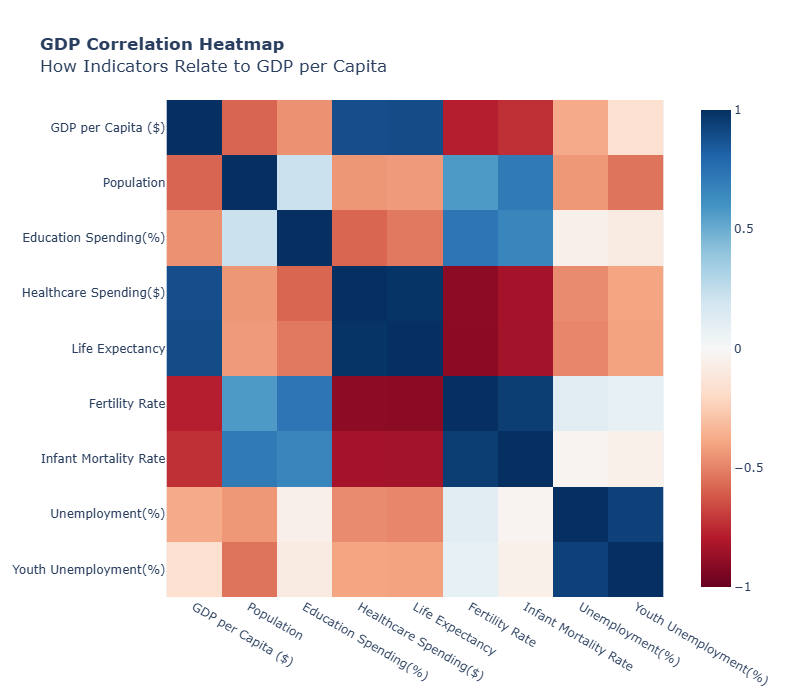

In [11]:
# Correlation Heatmap
filtered_df = df_clean.dropna(subset=reliable_columns)
filtered_df = filtered_df[(filtered_df[reliable_columns] > 0).all(axis=1)].copy()
corr_matrix = filtered_df[reliable_columns].corr()
heatmap = px.imshow(
    corr_matrix,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    color_continuous_scale='RdBu',
    zmin=-1,
    zmax=1,
    title="<b>GDP Correlation Heatmap</b><br>How Indicators Relate to GDP per Capita"
)
heatmap.update_layout(width=800, height=700)
heatmap.show()

GDP per Capita shows strong positive correlation with Healthcare Spending and Life Expectancy, and strong negative correlation with Fertility Rate and Infant Mortality Rate,a well documented trends among developed countries. What is a little bit unexpected is that there is no strong positive correlation between Education Spending and GDP per Capita.

Life Expectancy shows strong negative correlation between Fertility Rate and Infant Mortality Rate. Fertility Rate has a strong positive correlation with Infant Mortality Rate, suggesting countries with higher infant mortality rates also tend to have higher birth rates.

Literacy(%) has missing data for a lot of developed countries, so we will perform Last Observation Carried Forward (LOCF) imputation, to check if there is a positive correlation between GDP per Capita and Literacy.

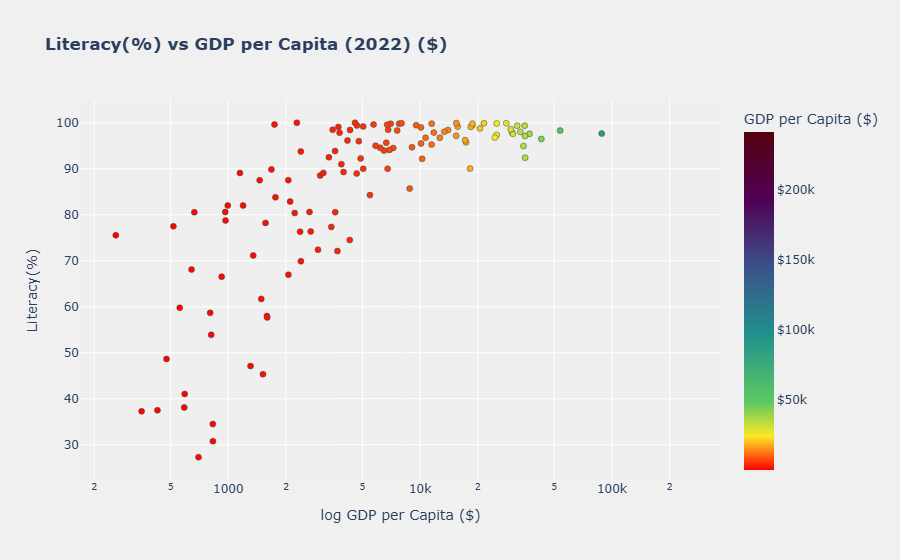

In [12]:
from helpers.filters import sort_dataframe, replace_zero_and_ffill
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

col_to_clean = [
    'Literacy(%)'
]

df_literacy = df.copy()

df_2022 = (df_literacy
           .pipe(filter_none, 'GDP per Capita ($)')
           .pipe(sort_dataframe, by_columns=['Country', 'Year'])
           .pipe(replace_zero_and_ffill, 
                 columns_to_impute=col_to_clean, 
                 group_by_column='Country')
           .pipe(filter_by_year, 2022)
          )

custom_scale = [
    [0.0, '#ff0000'],
    [0.1, '#fde725'],
    [0.2, '#5ec962'],
    [0.4, '#21918c'],
    [0.6, '#3b528b'],
    [0.8, '#500154'],
    [1.0, '#54010f']
]

# Create the scatter plot
fig = px.scatter(
    df_2022,
    x='GDP per Capita ($)',
    y='Literacy(%)',
    hover_name='Country',
    color='GDP per Capita ($)',
    color_continuous_scale=custom_scale,
    title='<b>Literacy(%) vs GDP per Capita (2022) ($)</b><br>',
    log_x=True,  # Log scale for better visualization
    labels={
        'GDP per Capita ($)': 'log GDP per Capita ($)',
        'Literacy(%)': 'Literacy(%)'
    }
)

fig.update_traces(
    hovertemplate=(
        "<b>%{hovertext}</b><br>"
        "log GDP per Capita ($): $%{x:,.0f}<br>"
        "Literacy(%): %{y:.1f}%<br>"
    ),
    marker=dict(line=dict(width=0.5, color='DarkSlateGrey'))
)

fig.update_layout(
    height=560,
    width=900,
    plot_bgcolor='rgba(240,240,240,0.9)',
    paper_bgcolor='rgba(240,240,240,0.9)',
    xaxis=dict(gridcolor='white'),
    yaxis=dict(gridcolor='white'),
    coloraxis_colorbar=dict(
        title="GDP per Capita ($)",
        tickprefix="$"
    )
)

fig.show()

As plot suggests, there is a positive correlation between GDP per Capita and Literacy. In the lower-income countries, there's a steep rise, a small increase in literacy seems to be associated with a large increase in GDP. The middle section doesn't provide such a strong correlation, indicating that the relationship is still positive, but perhaps with diminishing returns. In the higher-income countries (high GDP), the curve plateau.  

The features that strongly impact GDP per Capita are Healthcare Spending, Life Expectancy, Fertility Rate, Infant Mortality Rate and Literacy, so let's use these features and see if we can predict GDP per Capita.

In [13]:
from helpers.filters import sort_dataframe
# Clean and sort data, using the ones used for Correlation Heatmap for entire df
df_copy = df.copy()
df_prepared = (df_copy
               .pipe(filter_none, 'GDP per Capita ($)')
               .pipe(sort_dataframe, by_columns=['Country', 'Year'])
              )

In [14]:
from helpers.filters import add_log_columns			
# 'GDP per Capita ($') and 'Healthcare Spending($)' are covering huge range
# so let's create a log columns
# Create the log-transformed GDP column
# Create the log-transformed Healthcare Spending column
log_columns = ['GDP per Capita ($)', 'Healthcare Spending($)']
filtered_and_log_df = add_log_columns(df_prepared, log_columns)

print(filtered_and_log_df.head())

       Country  Year  GDP per Capita ($)  Population  Education Spending(%)  \
0  Afghanistan  2019               498.0  37769499.0                    NaN   
1  Afghanistan  2020               512.0  38972230.0                    NaN   
2  Afghanistan  2021               356.0  40099462.0                    NaN   
3  Afghanistan  2022               353.0  41128771.0                    NaN   
4      Albania  2019              5396.0   2854191.0                   11.4   

   Healthcare Spending($)  Literacy(%)  Life Expectancy  Fertility Rate  \
0                    74.0         0.00             64.0           4.870   
1                    80.0         0.00             63.0           4.750   
2                    81.0        37.27             62.0           4.643   
3                     0.0         0.00             63.0           4.523   
4                   368.0         0.00             79.0           1.414   

   Infant Mortality Rate  Unemployment(%)  Youth Unemployment(%)  \
0     

In [15]:
from sklearn.model_selection import train_test_split
# y is a target variable
y = filtered_and_log_df['log GDP per Capita ($)']

# X contains all other columns
X = filtered_and_log_df.drop('log GDP per Capita ($)', axis=1)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Rows in train set: {len(X_train)}\nRows in test set: {len(X_test)}\n")

Rows in train set: 580
Rows in test set: 249



In [16]:
from helpers.filters import final_processing

# Configuration for the final step
columns_to_impute = ['Healthcare Spending($)', 'Life Expectancy', 'Fertility Rate', 
                     'Infant Mortality Rate', 'Literacy(%)']

# Since these values are not important for training, let's just drop them before filiing any missing values
first_set_of_columns_to_drop = ['Population', 'Education Spending(%)',
                                'Unemployment(%)', 'Youth Unemployment(%)']

final_columns_to_drop = ['Country', 'Year', 
                         'GDP per Capita ($)', 'Healthcare Spending($)']

# The final processing to train/test set
X_train_processed = final_processing(X_train, 2022, columns_to_impute, first_set_of_columns_to_drop, final_columns_to_drop)
X_test_processed = final_processing(X_test, 2022, columns_to_impute, first_set_of_columns_to_drop, final_columns_to_drop)

y_train = y_train.loc[X_train_processed.index]
y_test = y_test.loc[X_test_processed.index]

print(f"Rows in processed train set: {len(X_train_processed)}\nRows in processed test set: {len(X_test_processed)}\n")

Rows in processed train set: 43
Rows in processed test set: 7



In [17]:
print(X_train_processed.head())

     Literacy(%)  Life Expectancy  Fertility Rate  Infant Mortality Rate  \
343        99.10             76.0           1.520                    3.3   
511        99.18             73.0           2.774                   11.5   
227        74.50             70.0           2.878                   15.5   
495        95.25             75.0           1.803                   11.0   
107        94.69             73.0           1.626                   12.5   

     log Healthcare Spending($)  
343                   -2.302585  
511                   -2.302585  
227                   -2.302585  
495                   -2.302585  
107                   -2.302585  


In [18]:
print(X_train_processed.describe())

       Literacy(%)  Life Expectancy  Fertility Rate  Infant Mortality Rate  \
count    43.000000        43.000000       43.000000              43.000000   
mean     84.391163        70.162791        2.775395              19.972093   
std      19.315159         7.699506        1.378407              18.642901   
min      27.280000        53.000000        1.040000               1.500000   
25%      78.055000        65.000000        1.703000               5.600000   
50%      93.750000        72.000000        2.369000              11.900000   
75%      98.360000        75.000000        3.750000              28.700000   
max     100.000000        83.000000        6.215000              73.500000   

       log Healthcare Spending($)  
count                   43.000000  
mean                    -1.653408  
std                      2.403841  
min                     -2.302585  
25%                     -2.302585  
50%                     -2.302585  
75%                     -2.302585  
max      

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_scaled: (43, 5)
Shape of X_test_scaled: (7, 5)
Shape of y_train: (43,)
Shape of y_test: (7,)


In [20]:
# Linear regression
from sklearn.linear_model import LinearRegression

# Train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R2 score: {r2:.2f}")
print(f"Mean squared error: {mse:.2f}")

scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

print(f"Cross-validation R2 scores: {scores}")
print(f"Average R2 score: {scores.mean():.2f}")

R2 score: 0.73
Mean squared error: 0.55
Cross-validation R2 scores: [ 0.2133577  -0.247656   -0.7014934   0.61925006  0.6610128 ]
Average R2 score: 0.11


Cross-validation scores are extremely volatile, ranging from okayish (0.65) to very poor (negative), which indicates that the model is unstable. Let's try with Ridge regression. 

In [22]:
# Ridge regression
from sklearn.linear_model import Ridge

# Train the linear regression model
model = Ridge()
model.fit(X_train_scaled, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [23]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R2 score: {r2:.2f}")
print(f"Mean squared error: {mse:.2f}")

scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

print(f"Cross-validation R2 scores: {scores}")
print(f"Average R2 score: {scores.mean():.2f}")

R2 score: 0.76
Mean squared error: 0.47
Cross-validation R2 scores: [ 0.20689391 -0.12589313 -0.14507807  0.60403399  0.68044758]
Average R2 score: 0.24


In [24]:
# Checking coeficoefficients to see features' impacts
feature_importances = model.coef_
print(feature_importances)

[ 0.19759624  0.50163697 -0.53669727  0.06669796  0.04960398]


Since model is still unstable, let's try removing some of the feautures that contribute the least, so 'Infant Mortality Rate' and 'log Healthcare Spending($)' will be removed from the next model training. We'll also remove 'Literacy (%)', because if we check the GDP per Capita vs Literacy plot, we can see a positive correlation, but after some literacy threshold, there is a platau. 

In [25]:
from helpers.filters import sort_dataframe
from helpers.filters import add_log_columns	
from sklearn.model_selection import train_test_split

df_copy = df.copy()
df_prepared = (df_copy
               .pipe(filter_none, 'GDP per Capita ($)')
               .pipe(sort_dataframe, by_columns=['Country', 'Year'])
              )


# Create the log-transformed GDP column
log_columns = ['GDP per Capita ($)']
filtered_and_log_df = add_log_columns(df_prepared, log_columns)

# y is a target variable
y = filtered_and_log_df['log GDP per Capita ($)']

# X contains all other columns
X = filtered_and_log_df.drop('log GDP per Capita ($)', axis=1)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Rows in train set: {len(X_train)}\nRows in test set: {len(X_test)}\n")

Rows in train set: 580
Rows in test set: 249



In [26]:
from helpers.filters import final_processing

# Configuration for the final step
columns_to_impute = ['Life Expectancy', 'Fertility Rate']

first_set_of_columns_to_drop = ['Population', 'Education Spending(%)',
                                'Unemployment(%)', 'Youth Unemployment(%)', 
                                'Healthcare Spending($)', 'Infant Mortality Rate', 'Literacy(%)']

final_columns_to_drop = ['Country', 'Year', 'GDP per Capita ($)']

# The final processing to train/test set
X_train_processed = final_processing(X_train, 2022, columns_to_impute, first_set_of_columns_to_drop, final_columns_to_drop)
X_test_processed = final_processing(X_test, 2022, columns_to_impute, first_set_of_columns_to_drop, final_columns_to_drop)

y_train = y_train.loc[X_train_processed.index]
y_test = y_test.loc[X_test_processed.index]

print(f"Rows in processed train set: {len(X_train_processed)}\nRows in processed test set: {len(X_test_processed)}\n")

Rows in processed train set: 140
Rows in processed test set: 56



In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_scaled: (140, 2)
Shape of X_test_scaled: (56, 2)
Shape of y_train: (140,)
Shape of y_test: (56,)


In [28]:
# Linear regression
from sklearn.linear_model import LinearRegression

# Train the LinearRegression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R2 score: {r2:.2f}")
print(f"Mean squared error: {mse:.2f}")

scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

print(f"Cross-validation R2 scores: {scores}")
print(f"Average R2 score: {scores.mean():.2f}")

R2 score: 0.71
Mean squared error: 0.58
Cross-validation R2 scores: [0.73492438 0.69172498 0.53976958 0.83649929 0.72110914]
Average R2 score: 0.70


In [30]:
def plot_actual_vs_prediction(y_test, y_pred, model_name):

  fig = go.Figure()

  fig.add_trace(go.Scatter(
      x=y_test,
      y=y_pred,
      mode='markers',
      name='Predicted vs. Actual',
      marker=dict(
          size=8,
          color='rgba(152, 0, 0, .8)',
          line=dict(width=1, color='rgba(0, 0, 0, .8)')
      )
  ))

  # Add the ideal line (where predicted equals actual)
  fig.add_trace(go.Scatter(
      x=[min(y_test), max(y_test)],
      y=[min(y_test), max(y_test)],
      mode='lines',
      name='Ideal Prediction',
      line=dict(color='gray', dash='dash')
  ))

  fig.update_layout(
      title='Predicted vs. Actual GDP per Capita - ' + model_name,
      xaxis_title='Actual log GDP per Capita ($)',
      yaxis_title='Predicted log GDP per Capita ($)',
      hovermode='closest',
      showlegend=True
  )

  fig.show()

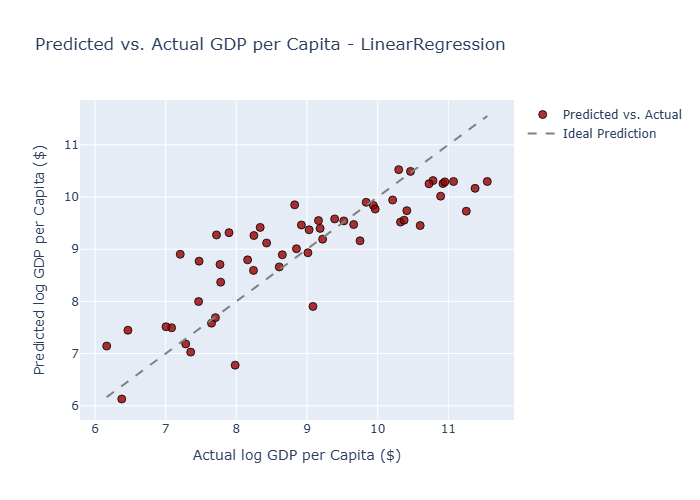

In [31]:
plot_actual_vs_prediction(y_test, y_pred, "LinearRegression")

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Calculate the mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R2 score: {r2:.2f}")
print(f"Mean squared error: {mse:.2f}")

scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='r2')

print(f"Cross-validation R2 scores: {scores}")
print(f"Average R2 score: {scores.mean():.2f}")

R2 score: 0.76
Mean squared error: 0.47
Cross-validation R2 scores: [0.69985353 0.56190928 0.5735092  0.78572695 0.66790686]
Average R2 score: 0.66


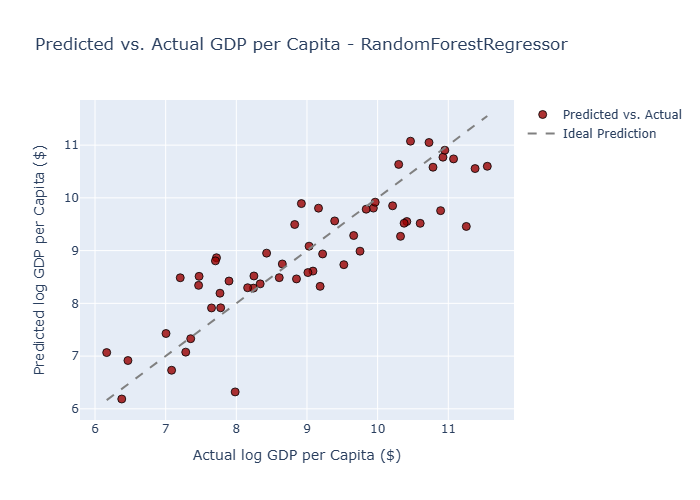

In [34]:
plot_actual_vs_prediction(y_test, y_pred, 'RandomForestRegressor')

We can see a linear relationship between selected features ('Life Expectancy', 'Fertility Rate') and GDP per Capita. These two models perform very similarly. Random Forest has slightly higher R-squared score, outperforming Linear regression model slightly. Let's see what these features look like.

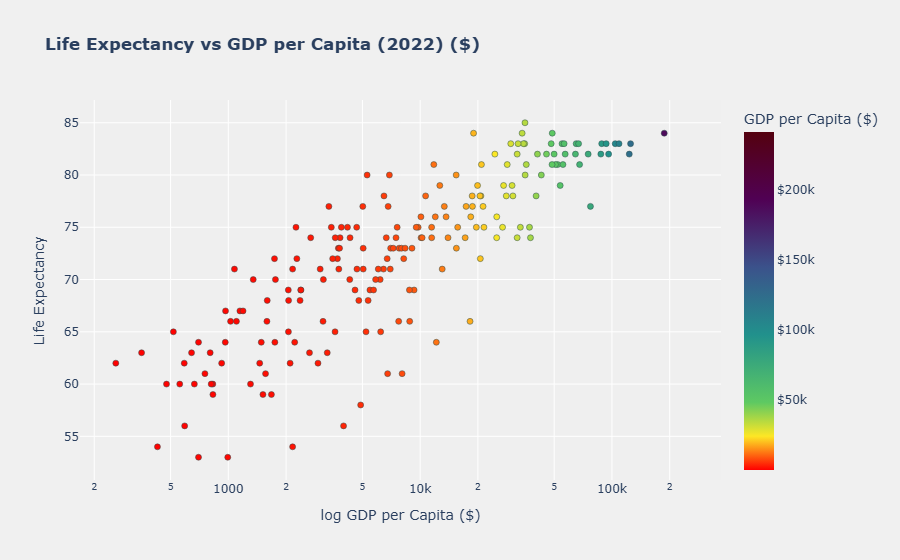

In [35]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

col_to_clean = [
    'Life Expectancy'
]

df_life_exp = df.copy()

df_2022 = (df_life_exp
           .pipe(filter_none, 'GDP per Capita ($)')
           .pipe(sort_dataframe, by_columns=['Country', 'Year'])
           .pipe(replace_zero_and_ffill, 
                 columns_to_impute=col_to_clean, 
                 group_by_column='Country')
           .pipe(filter_by_year, 2022)
          )

custom_scale = [
    [0.0, '#ff0000'],
    [0.1, '#fde725'],
    [0.2, '#5ec962'],
    [0.4, '#21918c'],
    [0.6, '#3b528b'],
    [0.8, '#500154'],
    [1.0, '#54010f']
]

# Create the scatter plot
fig = px.scatter(
    df_2022,
    x='GDP per Capita ($)',
    y='Life Expectancy',
    hover_name='Country',
    color='GDP per Capita ($)',
    color_continuous_scale=custom_scale,
    title='<b>Life Expectancy vs GDP per Capita (2022) ($)</b><br>',
    log_x=True,  # Log scale for better visualization
    labels={
        'GDP per Capita ($)': 'log GDP per Capita ($)',
        'Life Expectancy': 'Life Expectancy'
    }
)

fig.update_traces(
    hovertemplate=(
        "<b>%{hovertext}</b><br>"
        "GDP per Capita ($): $%{x:,.0f}<br>"
        "Life Expectancy (years): %{y:.0f}<br>"
    ),
    marker=dict(line=dict(width=0.5, color='DarkSlateGrey'))
)

fig.update_layout(
    height=560,
    width=900,
    plot_bgcolor='rgba(240,240,240,0.9)',
    paper_bgcolor='rgba(240,240,240,0.9)',
    xaxis=dict(gridcolor='white'),
    yaxis=dict(gridcolor='white'),
    coloraxis_colorbar=dict(
        title="GDP per Capita ($)",
        tickprefix="$"
    )
)

fig.show()

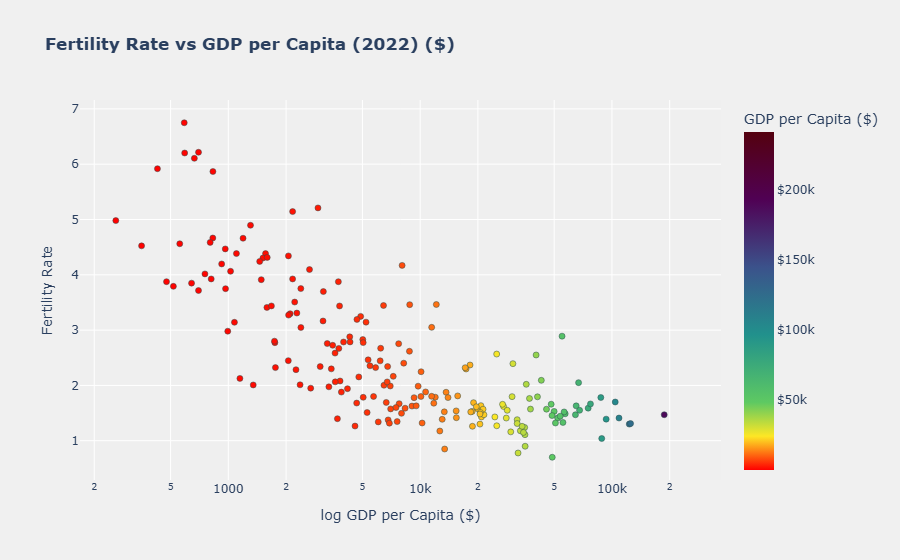

In [36]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

col_to_clean = [
    'Fertility Rate'
]

df_fertility = df.copy()

df_2022 = (df_fertility
           .pipe(filter_none, 'GDP per Capita ($)')
           .pipe(sort_dataframe, by_columns=['Country', 'Year'])
           .pipe(replace_zero_and_ffill, 
                 columns_to_impute=col_to_clean, 
                 group_by_column='Country')
           .pipe(filter_by_year, 2022)
          )

custom_scale = [
    [0.0, '#ff0000'],
    [0.1, '#fde725'],
    [0.2, '#5ec962'],
    [0.4, '#21918c'],
    [0.6, '#3b528b'],
    [0.8, '#500154'],
    [1.0, '#54010f']
]

# Create the scatter plot
fig = px.scatter(
    df_2022,
    x='GDP per Capita ($)',
    y='Fertility Rate',
    hover_name='Country',
    color='GDP per Capita ($)',
    color_continuous_scale=custom_scale,
    title='<b>Fertility Rate vs GDP per Capita (2022) ($)</b><br>',
    log_x=True,  # Log scale for better visualization
    labels={
        'GDP per Capita ($)': 'log GDP per Capita ($)',
        'Fertility Rate': 'Fertility Rate'
    }
)

fig.update_traces(
    hovertemplate=(
        "<b>%{hovertext}</b><br>"
        "GDP per Capita ($): $%{x:,.0f}<br>"
        "Fertility Rate: %{y:.0f}<br>"
    ),
    marker=dict(line=dict(width=0.5, color='DarkSlateGrey'))
)

fig.update_layout(
    height=560,
    width=900,
    plot_bgcolor='rgba(240,240,240,0.9)',
    paper_bgcolor='rgba(240,240,240,0.9)',
    xaxis=dict(gridcolor='white'),
    yaxis=dict(gridcolor='white'),
    coloraxis_colorbar=dict(
        title="GDP per Capita ($)",
        tickprefix="$"
    )
)

fig.show()

For both plots we can see a strong linear correlation with GDP per Capita, well documented trends that life expectancy is higher in developed countries and that fertility rates are lower, compared to lower income countries. There are some countries that are "off" trends, like ex. Nauru with GDP per Capita in a range with China, but fertility rate as Ghana, that has almost 5 times lower GDP per Capita. 
Let's try to divide countries in income groups to see if the trends would be easier to deduce. 

We can divide the countries in groups:

*   Low-income economies — GNI per capita of up to $1,135

*   Lower-middle-income economies — GNI per capita of \$1,136 to \$4,465

*   Upper-middle-income economies — GNI per capita of \$4,466 to \$13,845

*   High-income economies — GNI per capita of $13,846 or more

Although the data is in GNI per capita, we will assume similar numbers for GDP per capita, since no World Bank's thresholds with GDP per Capita could be found.
We can then use Random Forest Classification to predict categorical outcomes based on the input data to see if we can outperform the above results.

In [37]:
from helpers.filters import sort_dataframe
df_copy = df.copy()
df_prepared = (df_copy
               .pipe(filter_none, 'GDP per Capita ($)')
               .pipe(sort_dataframe, by_columns=['Country', 'Year'])
              )

conditions = [
    # Low-income economies
    (df_prepared['GDP per Capita ($)'] <= 1135),

    # Lower-middle-income economies
    (df_prepared['GDP per Capita ($)'] > 1135) & (df_prepared['GDP per Capita ($)'] <= 4465),

    # Upper-middle-income economies
    (df_prepared['GDP per Capita ($)'] > 4465) & (df_prepared['GDP per Capita ($)'] <= 13845),

    # High-income economies
    (df_prepared['GDP per Capita ($)'] > 13845)
]

labels = [
    'Low-income',
    'Lower-middle-income',
    'Upper-middle-income',
    'High-income'
]

# New Income_Group column
df_prepared['Income Group'] = np.select(conditions, labels, default='Uncategorized')

# Check the distribution of countries across groups
print(df_prepared['Income Group'].value_counts())

print(df_prepared.head())

income_mapping = {
    'Low-income': 0,
    'Lower-middle-income': 1,
    'Upper-middle-income': 2,
    'High-income': 3
}

# Apply the mapping to create the numerical target variable
df_prepared['Income Group'] = df_prepared['Income Group'].map(income_mapping)

Income Group
High-income            304
Upper-middle-income    213
Lower-middle-income    207
Low-income             105
Name: count, dtype: int64
       Country  Year  GDP per Capita ($)  Population  Education Spending(%)  \
0  Afghanistan  2019               498.0  37769499.0                    NaN   
1  Afghanistan  2020               512.0  38972230.0                    NaN   
2  Afghanistan  2021               356.0  40099462.0                    NaN   
3  Afghanistan  2022               353.0  41128771.0                    NaN   
4      Albania  2019              5396.0   2854191.0                   11.4   

   Healthcare Spending($)  Literacy(%)  Life Expectancy  Fertility Rate  \
0                    74.0         0.00             64.0           4.870   
1                    80.0         0.00             63.0           4.750   
2                    81.0        37.27             62.0           4.643   
3                     0.0         0.00             63.0           4.523   
4  

In [38]:
from sklearn.model_selection import train_test_split
# y is a target variable
y = df_prepared['Income Group']

# X contains all other columns
X = df_prepared.drop('Income Group', axis=1)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Rows in train set: {len(X_train)}\nRows in test set: {len(X_test)}\n")

Rows in train set: 580
Rows in test set: 249



In [39]:
from helpers.filters import final_processing

# Configuration for the final step
columns_to_impute = ['Life Expectancy', 'Fertility Rate']

first_set_of_columns_to_drop = ['Population', 'Education Spending(%)',
                                'Unemployment(%)', 'Youth Unemployment(%)', 
                                'Healthcare Spending($)', 'Infant Mortality Rate', 'Literacy(%)']

final_columns_to_drop = ['Country', 'Year', 'GDP per Capita ($)']

# The final processing to train/test set
X_train_processed = final_processing(X_train, 2022, columns_to_impute, first_set_of_columns_to_drop, final_columns_to_drop)
X_test_processed = final_processing(X_test, 2022, columns_to_impute, first_set_of_columns_to_drop, final_columns_to_drop)

y_train = y_train.loc[X_train_processed.index]
y_test = y_test.loc[X_test_processed.index]

print(f"Rows in processed train set: {len(X_train_processed)}\nRows in processed test set: {len(X_test_processed)}\n")

Rows in processed train set: 140
Rows in processed test set: 56



In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_scaled: (140, 2)
Shape of X_test_scaled: (56, 2)
Shape of y_train: (140,)
Shape of y_test: (56,)


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Randomly samples combinations of hyperparameters from the search space
param_dist = {
    'n_estimators': randint(20, 200),
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': randint(1, 9)
}

classifier = RandomForestClassifier(random_state=42)

# create RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=classifier, 
    param_distributions=param_dist, 
    n_iter=50,  # 50 different combinations
    cv=5, 
    random_state=42,
    scoring='accuracy',
    n_jobs=-1  # uses all available CPU cores
)

random_search.fit(X_train_scaled, y_train)

print(f"Best Parameters found: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_:.4f}")

# using best model found by the search for predictions
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

Best Parameters found: {'max_depth': 3, 'min_samples_leaf': 3, 'n_estimators': 78}
Best cross-validation score: 0.5643


In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 60.71%
Confusion Matrix:
[[ 3  1  0  0]
 [ 4  6  7  0]
 [ 0  1  9  4]
 [ 0  0  5 16]]


The accuracy is ok, but also really divided. Let's check classification report.

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=labels))

                     precision    recall  f1-score   support

         Low-income       0.43      0.75      0.55         4
Lower-middle-income       0.75      0.35      0.48        17
Upper-middle-income       0.43      0.64      0.51        14
        High-income       0.80      0.76      0.78        21

           accuracy                           0.61        56
          macro avg       0.60      0.63      0.58        56
       weighted avg       0.67      0.61      0.61        56



Model performs the best for high income countries, it correctly predicts the country as high income country 80% of the time and it successfully finds 76% of the countries in this category. For the low income countries, the model prediction is correct only 43% of the time, but it successfully identifies 75% of them. Although prediction for lower-middle income countries is correct 75% of the time, it only finds 35% of the countries that are actually in this group. For the upper-middle income group, the model is struggling, it is correct less than helf the time and it finds okayish 64% of the actual countries in this group. 
Model is strongest at identifying two extremes, low and high income countries, while it struggles the most with two middle classes, where distinctions are hardest to define. 
This indicates that we have some significant socio-economic factors predicting countries' Income Group value, but as always, the world is not black and white.

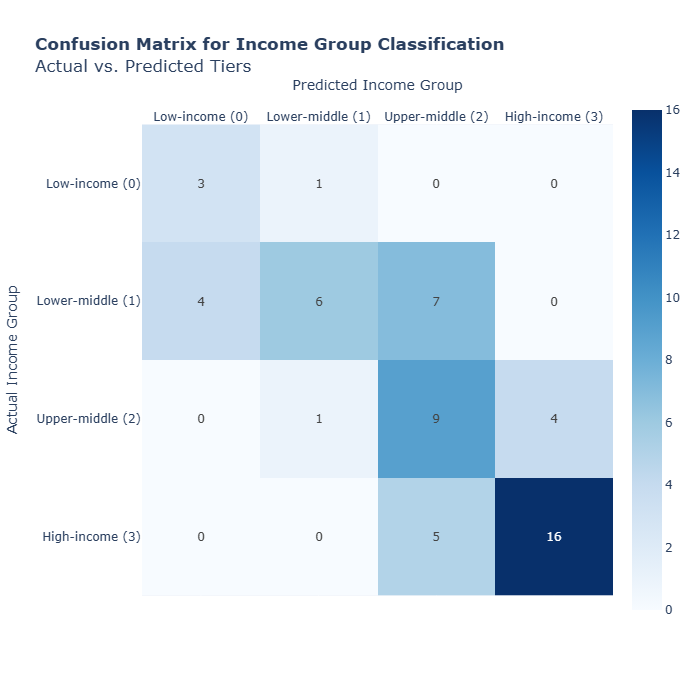

In [44]:
import plotly.express as px
import numpy as np

labels = ['Low-income (0)', 'Lower-middle (1)', 'Upper-middle (2)', 'High-income (3)']

conf_matrix_plot = px.imshow(
    conf_matrix,
    x=labels,
    y=labels,
    color_continuous_scale='Blues',
    text_auto=True,
    title="<b>Confusion Matrix for Income Group Classification</b><br>Actual vs. Predicted Tiers"
)

conf_matrix_plot.update_layout(
    xaxis_title="Predicted Income Group",
    yaxis_title="Actual Income Group",
    xaxis={'side': 'top'},
    width=700,
    height=700
)

conf_matrix_plot.show()

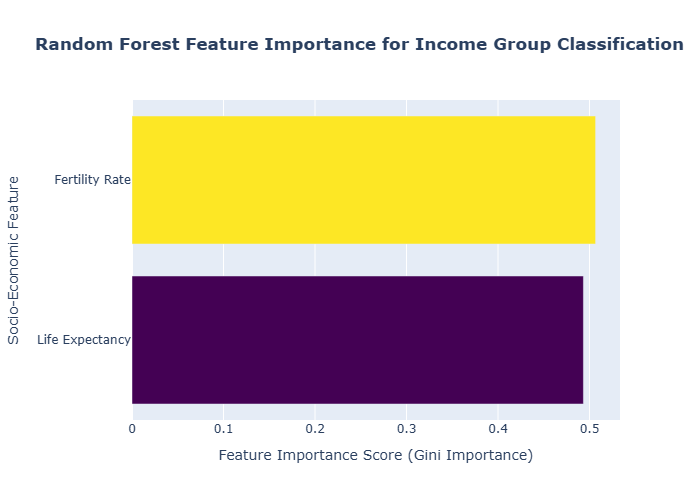

In [45]:
import pandas as pd
import plotly.express as px

feature_names = X_train_processed.columns
importances = best_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=True)

fig = px.bar(
    importance_df,
    x='Importance',
    y='Feature',
    orientation='h',
    title='<b>Random Forest Feature Importance for Income Group Classification</b>',
    color='Importance',
    color_continuous_scale=px.colors.sequential.Viridis
)

fig.update_layout(
    xaxis_title="Feature Importance Score (Gini Importance)",
    yaxis_title="Socio-Economic Feature",
    coloraxis_showscale=False,
    height=500
)

fig.show()

Conclusion:


*   The regression model, with an average cross-validation R² of 0.70, confirms that 'Life Expectancy' and 'Fertility Rate' are powerful predictors, explaining a large portion of the variance in a country's wealth.
*   These same factors are also effective in predicting a country's Income Group (classification), achieving an accuracy of 60%.
*   While the model is predictive, the 40% of misclassifications highlights the problem's inherent complexity. This suggests that the remaining variance is likely influenced by important unmeasured factors, such as political stability, institutional quality, or geographical resources.




